In [2]:
import cvxpy as cvx
import numpy as np

# Input constraints
max_inp = 0.2

# Steps
N = 15 

# Define the terminal state in half-space form
targetLHS = np.matrix([[-1, 0],[0, -1],[1, 0],[0, 1]])
targetRHS_1 = np.matrix([-9.5,-9.5,10.5,10.5]).T
targetRHS=targetRHS_1
for i in range(N-1):
    targetRHS=np.column_stack((targetRHS,targetRHS_1))
    
#### Add in Matrix to extract the two position states here ####
posMatrix = np.matrix('1,0,0,0;0,1,0,0')

# Define the obstacle in half-space form
obsLHS = targetLHS
obsRHS_1 = np.matrix([-3.5,-3.5,6.5,6.5]).T
obsRHS=obsRHS_1
for i in range(N-1):
    obsRHS=np.column_stack((obsRHS,obsRHS_1))

# Vertices of the obstacle
obsVerts = np.asarray([[3.5,3.5,6.5,6.5,3.5],[3.5,6.5,6.5,3.5,3.5]])

#### Define the system matrices (as matrix types so we can multiply) ####
A = np.matrix('1,0,1,0;0,1,0,1;0,0,1,0;0,0,0,1')
B = np.matrix('0.5,0;0,0.5;1,0;0,1')

# Define the decision variables
X = cvx.Variable(4,N+1) # States
U = cvx.Variable(2,N) # Inputs
b = cvx.Bool(4,N) # Binary Variables

#### Define the Big-M constraint here ####
M = 20

#### Define dynamic constraints here ####

## Initial condition
con = [X[:,0] == np.matrix('0;0;0;0')]  
## Dynamics
con.extend([X[:,1:16] == A*X[:,0:15] + B*U]) 
## Input constraints
con.extend([cvx.norm(cvx.sum_entries(U,axis=0),'inf')<=0.5]) 
## obstacle avoidance
con.extend([ obsLHS*posMatrix*X[:,1:16] <= obsRHS - M*b ]) 
con.extend([cvx.sum_entries(b,axis=1)<=3]) 


#### Define the objective (minimize 1-norm of input) ####
obj = cvx.Minimize(cvx.norm(U,1))

# Solve the optimization problem
prob = cvx.Problem(obj, con)
prob.solve()
import cvxpy as cvx
import numpy as np

# Input constraints
max_inp = 0.2

# Steps
N = 15 

# Define the terminal state in half-space form
targetLHS = np.matrix([[-1, 0],[0, -1],[1, 0],[0, 1]])
targetRHS_1 = np.matrix([-9.5,-9.5,10.5,10.5]).T
targetRHS=targetRHS_1



for i in range(N-1):
    targetRHS=np.column_stack((targetRHS,targetRHS_1))
    
#### Add in Matrix to extract the two position states here ####
posMatrix = np.matrix('1,0,0,0;0,1,0,0')

# Define the obstacle in half-space form
obsLHS = targetLHS
obsRHS_1 = np.matrix([-3.5,-3.5,6.5,6.5]).T
obsRHS=obsRHS_1

for i in range(N-1):
    obsRHS=np.column_stack((obsRHS,obsRHS_1))

# Vertices of the obstacle
obsVerts = np.asarray([[3.5,3.5,6.5,6.5,3.5],[3.5,6.5,6.5,3.5,3.5]])

#### Define the system matrices (as matrix types so we can multiply) ####
A = np.matrix('1,0,1,0;0,1,0,1;0,0,1,0;0,0,0,1')
B = np.matrix('0.5,0;0,0.5;1,0;0,1')

# Define the decision variables
X = cvx.Variable(4,N+1) # States
U = cvx.Variable(2,N) # Inputs
b = cvx.Bool(4,N) # Binary Variables

#### Define the Big-M constraint here ####
M = 25

#### Define dynamic constraints here ####

## Initial condition
con = [X[:,0] == np.matrix('0;0;0;0')]  
## Dynamics
con.extend([X[:,1:16] == A*X[:,0:15] + B*U])
## Input constraints 
con.extend([cvx.norm(U[:,j],'inf')<=0.5 for j in range(0,N)])
## obstacle avoidance
con.extend([ obsLHS*posMatrix*X[:,1:16] >= obsRHS - M*b ])
con.extend([cvx.sum_entries(b,axis=1)<=3])
## Terminal constraint
con.extend([targetLHS*posMatrix*X[:,15] <= targetRHS_1])

#### Define the objective (minimize 1-norm of input) ####
obj = cvx.Minimize(cvx.norm(U,1))

# Solve the optimization problem
prob = cvx.Problem(obj, con)
prob.solve()

ModuleNotFoundError: No module named 'cvxpy'

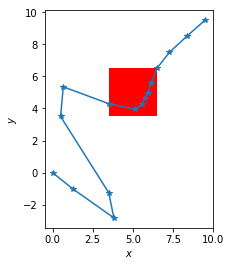

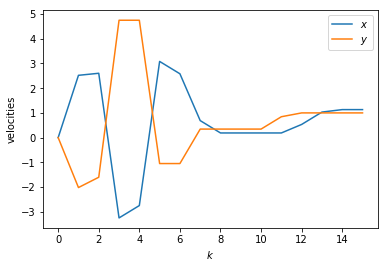

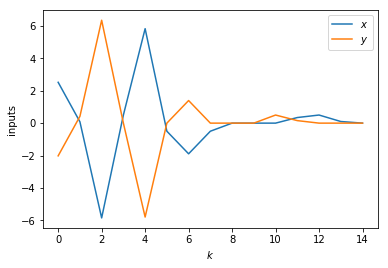

In [83]:

import matplotlib.pyplot as plt
x_vals = X.value.T
u_vals = U.value.T
plt.figure()
plt.plot(x_vals[:,0],x_vals[:,1],'*-')
plt.fill(obsVerts[0,:],obsVerts[1,:],'r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('scaled')
plt.show()

plt.figure()
plt.plot(np.arange(0,N+1).T,x_vals[:,2],'-',label='$x$')
plt.plot(np.arange(0,N+1).T,x_vals[:,3],'-',label='$y$')
plt.xlabel('$k$'); plt.ylabel('velocities')
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(0,N).T,u_vals[:,0],'-',label='$x$')
plt.plot(np.arange(0,N).T,u_vals[:,1],'-',label='$y$')
plt.xlabel('$k$'); plt.ylabel('inputs')
plt.legend()
plt.show()